## Ch `07`: Concept 02

## Autoencoder with images

Import the autoencoder class we wrote earlier:

In [1]:
%matplotlib inline
import cPickle
import numpy as np
from autoencoder import Autoencoder

Define some helper function to load and preprocess the data:

In [2]:
def unpickle(file):
    fo = open(file, 'rb')
    dict = cPickle.load(fo)
    fo.close()
    return dict

def grayscale(a):
    return a.reshape(a.shape[0], 3, 32, 32).mean(1).reshape(a.shape[0], -1)

Download the CIFAR-10 dataset in Python from https://www.cs.toronto.edu/~kriz/cifar.html. Then we can load the data using the following code:

In [3]:
names = unpickle('./cifar-10-batches-py/batches.meta')['label_names']
data, labels = [], []
for i in range(1, 6):
    filename = './cifar-10-batches-py/data_batch_' + str(i)
    batch_data = unpickle(filename)
    if len(data) > 0:
        data = np.vstack((data, batch_data['data']))
        labels = np.vstack((labels, batch_data['labels']))
    else:
        data = batch_data['data']
        labels = batch_data['labels']

data = grayscale(data)
x = np.matrix(data)
y = np.array(labels)

horse_indices = np.where(y == 7)[0]

horse_x = x[horse_indices]

print(np.shape(horse_x))  # (5000, 3072)

(5000, 1024)


Train the autoencoder, and test the results:

In [4]:
input_dim = np.shape(horse_x)[1]
hidden_dim = 100
ae = Autoencoder(input_dim, hidden_dim)
ae.train(horse_x)

test_data = unpickle('./cifar-10-batches-py/test_batch')
test_x = grayscale(test_data['data'])
test_labels = np.array(test_data['labels'])
encoding = ae.classify(test_x, test_labels)
encoding = np.matrix(encoding)

epoch 0: loss = 122.498321533
epoch 10: loss = 35.433467865
epoch 20: loss = 13.739821434
epoch 30: loss = 2.89876747131
epoch 40: loss = 0.00175379647408
epoch 50: loss = 0.00161747739185
epoch 60: loss = 0.0022638363298
epoch 70: loss = 0.00189750210848
epoch 80: loss = 0.0016324595781
epoch 90: loss = 0.00194011465646
epoch 100: loss = 0.00238919141702
epoch 110: loss = 0.00185809808318
epoch 120: loss = 0.00206338916905
epoch 130: loss = 0.00179617630783
epoch 140: loss = 0.0014476334909
epoch 150: loss = 0.0019912396092
epoch 160: loss = 0.00130982522387
epoch 170: loss = 0.00169305771124
epoch 180: loss = 0.00191735720728
epoch 190: loss = 0.00217707059346
('data', (10000, 1024))
('reconstructed', (1024,))
('loss', (10000,))
('horse', 68.933727841476113)
('not horse', 67.185436586511344)


Visualize the original image:

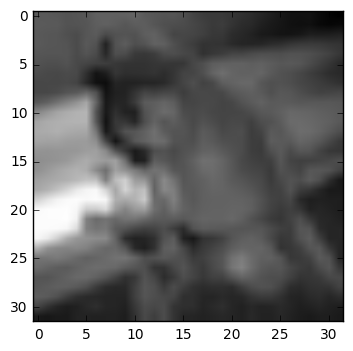

In [5]:
from matplotlib import pyplot as plt

# encoding = np.matrix(np.random.choice([0, 1], size=(hidden_dim,)))

original_img = np.reshape(test_x[7,:], (32,32))
plt.imshow(original_img, cmap='Greys_r')
plt.show()

Visualize the decoded image:

100


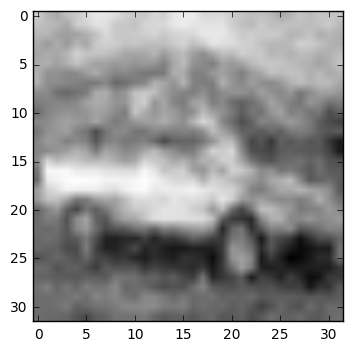

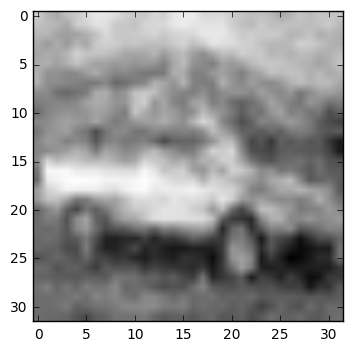

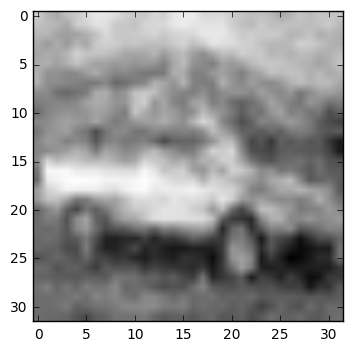

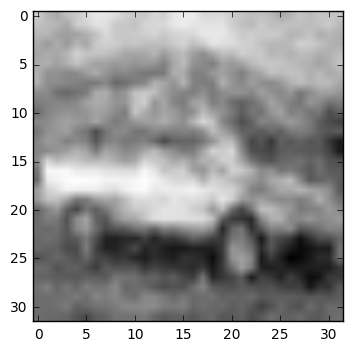

In [7]:
print(np.size(encoding))
for i in range(1, 5):
    img = ae.decode(encoding)
    plt.imshow(img, cmap='Greys_r')
    plt.show()
    rand_idx = np.random.randint(np.size(encoding))
    encoding[0,rand_idx] = np.random.randint(2)